In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
# Reading and writing Data

df_sales = pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv') 

df_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df_sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [5]:
df_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df_sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [7]:
df_sales.shape

(1000, 17)

In [8]:
# Statistical description for number data types

df_sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [9]:
# Statistical description for other data types only

df_sales.describe(include=['object'])

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [10]:
df_sales['City']

0         Yangon
1      Naypyitaw
2         Yangon
3         Yangon
4         Yangon
         ...    
995    Naypyitaw
996     Mandalay
997       Yangon
998       Yangon
999       Yangon
Name: City, Length: 1000, dtype: object

In [11]:
filter = df_sales[['Branch',"City",'Gender']]

filter


,Branch,City,Gender
0,A,Yangon,Female
1,C,Naypyitaw,Female
2,A,Yangon,Male
3,A,Yangon,Male
4,A,Yangon,Male
...,...,...,...
995,C,Naypyitaw,Male
996,B,Mandalay,Female
997,A,Yangon,Male
998,A,Yangon,Male


In [12]:
# Selecting row

df_sales.loc[0]

Invoice ID                       750-67-8428
Branch                                     A
City                                  Yangon
Customer type                         Member
Gender                                Female
Product line               Health and beauty
Unit price                             74.69
Quantity                                   7
Tax 5%                               26.1415
Total                               548.9715
Date                                1/5/2019
Time                                   13:08
Payment                              Ewallet
cogs                                  522.83
gross margin percentage             4.761905
gross income                         26.1415
Rating                                   9.1
Name: 0, dtype: object

In [13]:
# Selecting a specific cell from a specific row and column

df_sales.loc[0, 'Gender']

'Female'

In [14]:
df_sales.loc[0:10, ['Gender', 'City']]

,Gender,City
0,Female,Yangon
1,Female,Naypyitaw
2,Male,Yangon
3,Male,Yangon
4,Male,Yangon
5,Male,Naypyitaw
6,Female,Yangon
7,Female,Naypyitaw
8,Female,Yangon
9,Female,Mandalay


In [15]:
df_sales.loc[[0,3], 'Gender']

0    Female
3      Male
Name: Gender, dtype: object

In [16]:

df_sales.loc[0:15]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


In [17]:
df_sales.loc[[0,3]]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4


In [18]:
df_sales['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [19]:
df_sales.loc[df_sales['Product line'] == 'Sports and travel']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,1/1/2019,10:39,Credit card,435.66,4.761905,21.7830,6.9
24,549-59-1358,A,Yangon,Member,Male,Sports and travel,88.63,3,13.2945,279.1845,3/2/2019,17:36,Ewallet,265.89,4.761905,13.2945,6.0
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,321-49-7382,B,Mandalay,Member,Male,Sports and travel,88.31,1,4.4155,92.7255,2/15/2019,17:38,Credit card,88.31,4.761905,4.4155,5.2
929,825-94-5922,B,Mandalay,Normal,Male,Sports and travel,25.31,2,2.5310,53.1510,3/2/2019,19:26,Ewallet,50.62,4.761905,2.5310,7.2
937,361-85-2571,A,Yangon,Normal,Female,Sports and travel,89.48,5,22.3700,469.7700,3/30/2019,10:18,Cash,447.40,4.761905,22.3700,7.4
982,139-32-4183,A,Yangon,Member,Female,Sports and travel,97.48,9,43.8660,921.1860,3/14/2019,14:19,Ewallet,877.32,4.761905,43.8660,7.4


In [20]:
df_sales.loc[df_sales['Payment']== 'Cash']

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,3/9/2019,17:03,Cash,102.04,4.761905,5.1020,6.8
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2/8/2019,15:31,Cash,33.52,4.761905,1.6760,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,1/23/2019,10:33,Cash,699.72,4.761905,34.9860,6.1
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,1/9/2019,11:40,Cash,674.59,4.761905,33.7295,6.0
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [21]:
df_sales.loc[(df_sales["Payment"] == 'Cash') & (df_sales["City"] == 'Yangon') & (df_sales["Customer type"] == 'Member')].head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
51,162-48-8011,A,Yangon,Member,Female,Food and beverages,44.59,5,11.1475,234.0975,2/10/2019,15:10,Cash,222.95,4.761905,11.1475,8.5
56,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.4340,93.1140,3/27/2019,11:26,Cash,88.68,4.761905,4.4340,5.8
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.1750,759.6750,1/20/2019,15:55,Cash,723.50,4.761905,36.1750,5.4
65,877-22-3308,A,Yangon,Member,Male,Health and beauty,15.87,10,7.9350,166.6350,3/13/2019,16:40,Cash,158.70,4.761905,7.9350,5.8
69,382-03-4532,A,Yangon,Member,Female,Health and beauty,18.33,1,0.9165,19.2465,2/2/2019,18:50,Cash,18.33,4.761905,0.9165,4.3
131,802-70-5316,A,Yangon,Member,Female,Sports and travel,92.13,6,27.6390,580.4190,3/6/2019,20:34,Cash,552.78,4.761905,27.6390,8.3
137,354-39-5160,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.3260,216.8460,2/18/2019,15:39,Cash,206.52,4.761905,10.3260,9.8
217,319-74-2561,A,Yangon,Member,Female,Electronic accessories,94.64,3,14.1960,298.1160,2/21/2019,16:55,Cash,283.92,4.761905,14.1960,5.5
243,217-58-1179,A,Yangon,Member,Male,Home and lifestyle,62.65,4,12.5300,263.1300,1/5/2019,11:25,Cash,250.60,4.761905,12.5300,4.2
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.0360,399.7560,1/1/2019,14:47,Cash,380.72,4.761905,19.0360,5.7


In [22]:
df_sales[(df_sales['Payment']=='Cash') & (df_sales['City']=='Yangon') & (df_sales['Customer type']=='Member')][:10]
 

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
51,162-48-8011,A,Yangon,Member,Female,Food and beverages,44.59,5,11.1475,234.0975,2/10/2019,15:10,Cash,222.95,4.761905,11.1475,8.5
56,106-35-6779,A,Yangon,Member,Male,Home and lifestyle,44.34,2,4.4340,93.1140,3/27/2019,11:26,Cash,88.68,4.761905,4.4340,5.8
58,817-48-8732,A,Yangon,Member,Female,Home and lifestyle,72.35,10,36.1750,759.6750,1/20/2019,15:55,Cash,723.50,4.761905,36.1750,5.4
65,877-22-3308,A,Yangon,Member,Male,Health and beauty,15.87,10,7.9350,166.6350,3/13/2019,16:40,Cash,158.70,4.761905,7.9350,5.8
69,382-03-4532,A,Yangon,Member,Female,Health and beauty,18.33,1,0.9165,19.2465,2/2/2019,18:50,Cash,18.33,4.761905,0.9165,4.3
131,802-70-5316,A,Yangon,Member,Female,Sports and travel,92.13,6,27.6390,580.4190,3/6/2019,20:34,Cash,552.78,4.761905,27.6390,8.3
137,354-39-5160,A,Yangon,Member,Female,Home and lifestyle,34.42,6,10.3260,216.8460,2/18/2019,15:39,Cash,206.52,4.761905,10.3260,9.8
217,319-74-2561,A,Yangon,Member,Female,Electronic accessories,94.64,3,14.1960,298.1160,2/21/2019,16:55,Cash,283.92,4.761905,14.1960,5.5
243,217-58-1179,A,Yangon,Member,Male,Home and lifestyle,62.65,4,12.5300,263.1300,1/5/2019,11:25,Cash,250.60,4.761905,12.5300,4.2
245,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.0360,399.7560,1/1/2019,14:47,Cash,380.72,4.761905,19.0360,5.7


In [23]:
# selecting muliple columns using loc

df_sales.loc[0:20,['City','Quantity','Payment']]
 

,City,Quantity,Payment
0,Yangon,7,Ewallet
1,Naypyitaw,5,Cash
2,Yangon,7,Credit card
3,Yangon,8,Ewallet
4,Yangon,7,Ewallet
5,Naypyitaw,7,Ewallet
6,Yangon,6,Ewallet
7,Naypyitaw,10,Ewallet
8,Yangon,2,Credit card
9,Mandalay,3,Credit card


In [24]:
df_sales[['City','Quantity','Payment']][0:20]

,City,Quantity,Payment
0,Yangon,7,Ewallet
1,Naypyitaw,5,Cash
2,Yangon,7,Credit card
3,Yangon,8,Ewallet
4,Yangon,7,Ewallet
5,Naypyitaw,7,Ewallet
6,Yangon,6,Ewallet
7,Naypyitaw,10,Ewallet
8,Yangon,2,Credit card
9,Mandalay,3,Credit card


In [25]:
df_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
#importing the plotting library

import matplotlib.pyplot as plt

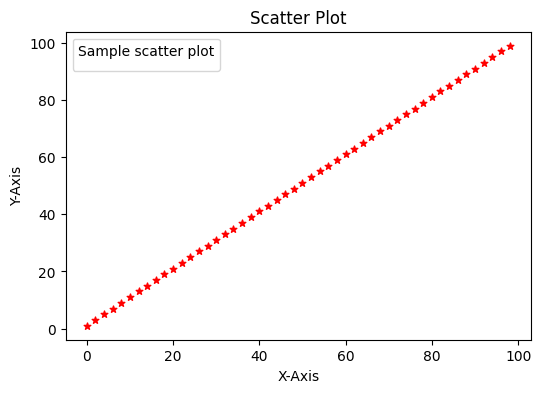

In [27]:
x=list(range(0,100,2))
y=list(range(1,100,2))

plt.figure(figsize=(6,4))   # making the figure bigger

# creating a scatter plot
plt.scatter(x,y, marker='*',s=25, c='red')
plt.title('Scatter Plot') # adding title 
# adding axis labels
plt.xlabel('X-Axis') 
plt.ylabel('Y-Axis')
plt.legend(title='Sample scatter plot')
# showing the plot
plt.show()

In [28]:
gender_grp=df_sales.groupby('Gender').count()
gender_grp

,Invoice ID,Branch,City,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,,,,,,,,
Female,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501,501
Male,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499


In [29]:
payment_city_grp=df_sales.groupby(['Payment','City']).count()
payment_city_grp

Invoice ID  Branch  Customer type  Gender  \
Payment     City                                                   
Cash        Mandalay          110     110            110     110   
            Naypyitaw         124     124            124     124   
            Yangon            110     110            110     110   
Credit card Mandalay          109     109            109     109   
            Naypyitaw          98      98             98      98   
            Yangon            104     104            104     104   
Ewallet     Mandalay          113     113            113     113   
            Naypyitaw         106     106            106     106   
            Yangon            126     126            126     126   

                       Product line  Unit price  Quantity  Tax 5%  Total  \
Payment     City                                                           
Cash        Mandalay            110         110       110     110    110   
            Naypyitaw           124         124       124     124    124   
            Yangon              110         110       110     110    110   
Credit card Mandalay            109         109       109     109    109   
            Naypyitaw            98          98        98      98     98   
            Yangon              104         104       104     104    104   
Ewallet     Mandalay            113         113       113     113    113   
            Naypyitaw           106         106       106     106    106   
            Yangon              126         126       126     126    126   

                       Date  Time  cogs  gross margin percentage  \
Payment     City                                                   
Cash        Mandalay    110   110   110                      110   
            Naypyitaw   124   124   124                      124   
            Yangon      110   110   110                      110   
Credit card Mandalay    109   109   109                      109   
            Naypyitaw    98    98    98                       98   
            Yangon      104   104   104                      104   
Ewallet     Mandalay    113   113   113                      113   
            Naypyitaw   106   106   106                      106   
            Yangon      126   126   126                      126   

                       gross income  Rating  
Payment     City                             
Cash        Mandalay            110     110  
            Naypyitaw           124     124  
            Yangon              110     110  
Credit card Mandalay            109     109  
            Naypyitaw            98      98  
            Yangon              104     104  
Ewallet     Mandalay            113     113  
            Naypyitaw           106     106  
            Yangon              126     126

In [30]:
pivot_city = df_sales.pivot_table(index='City', values='gross income', aggfunc='sum')
pivot_city

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


In [31]:
agg_pay_city=payment_city_grp.agg({'Customer type':['sum','mean']})

agg_pay_city
 

,Customer type
sum,1000.000000
mean,111.111111


In [32]:
pivot_city = df_sales.pivot_table(index='City', values='gross income', aggfunc='sum')
pivot_city

,gross income
City,
Mandalay,5057.0320
Naypyitaw,5265.1765
Yangon,5057.1605


# Saving data to csv file

In [33]:
df_sales.to_csv("sales_cleaned_data.csv")

In [34]:
x = [3,4,5,6,7]

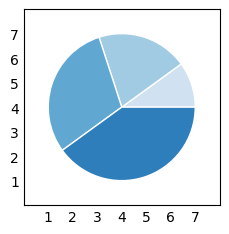

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery-nogrid')


# make data
x = [1, 2, 3, 4]
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()